In [1]:
%%capture
%run full_data.ipynb

In [2]:
import sys 
sys.path.append('..')
import portfolios as p

In [3]:
assigned_data_5 = pd.read_csv('assigned_data_5_LRET_1_filtered_1st_decile_out_fsample_NEW.csv')
assigned_data_10 = pd.read_csv('assigned_data_10_LRET_1_filtered_1st_decile_out_fsample_NEW.csv')
assigned_data_20 = pd.read_csv('assigned_data_20_LRET_1_filtered_1st_decile_out_fsample_NEW.csv')
assigned_data_50 = pd.read_csv('assigned_data_50_LRET_1_filtered_1st_decile_out_fsample_NEW.csv')

In [4]:
assigned_data_5['PORT_MEAN'] = 1
mean_ret = p.compute_strategy_returns(assigned_data_5,'PORT_MEAN',1)

In [5]:
rets_5 = p.portfolios_returns_mean_table(assigned_data_5,'LRET_1',5)
rets_10 = p.portfolios_returns_mean_table(assigned_data_10,'LRET_1',10)
rets_20 = p.portfolios_returns_mean_table(assigned_data_20,'LRET_1',20)
rets_50 = p.portfolios_returns_mean_table(assigned_data_50,'LRET_1',50)

../portfolios.py:176: RuntimeWarning: Mean of empty slice.
  returns[i] = p_data[ret].values.mean()
/home/jaakko/.local/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [6]:
rets_5_p = rets_5[10:].sort_index()
rets_10_p = rets_10[10:].sort_index()
rets_20_p = rets_20[10:].sort_index()
rets_50_p= rets_50[10:].sort_index()
mean_ret_p = mean_ret[10:].sort_index()

In [7]:
table_ports = pd.DataFrame()
table_ports['50-Q Losers'] = rets_50_p[1].values
table_ports['20-Q Losers'] = rets_20_p[1].values
table_ports['10-Q Losers'] = rets_10_p[1].values
table_ports['5-Q Losers'] = rets_5_p[1].values
table_ports['50-Q Winners'] = rets_50_p[50].values
table_ports['20-Q Winners'] = rets_20_p[20].values
table_ports['10-Q Winners'] = rets_10_p[10].values
table_ports['5-Q Winners'] = rets_5_p[5].values
table_ports['50-Q Long-short'] = rets_50_p[1].values - rets_50_p[47].values
table_ports['20-Q Long-short'] = rets_20_p[1].values - rets_20_p[19].values
table_ports['Universe ew'] = mean_ret_p['RET'].values
table_ports.index = rets_5_p.index

In [8]:
def fixed_period_portfolio_means(port_rets):
    table = pd.DataFrame()
    table['\'99-\'01'] = port_rets.loc[port_rets.index < 200201].mean()
    table['\'02-\'04'] = port_rets.loc[(port_rets.index >= 200201) & (port_rets.index < 200501)].mean()
    table['\'05-\'07'] = port_rets.loc[(port_rets.index >= 200501) & (port_rets.index < 200801)].mean()
    table['\'08-\'10'] = port_rets.loc[(port_rets.index >= 200801) & (port_rets.index < 201101)].mean()
    table['\'11-\'13'] = port_rets.loc[(port_rets.index >= 201101) & (port_rets.index < 201401)].mean()
    table['\'14-\'16'] = port_rets.loc[(port_rets.index >= 201401) & (port_rets.index < 201701)].mean()
    table['\'17-\'19'] = port_rets.loc[port_rets.index >= 201701].mean()
    table['\'99-\'19'] = port_rets.mean()
    table.index = port_rets.columns
    return (table*100).round(2)

In [9]:
fixed_period_portfolio_means(table_ports)

,'99-'01,'02-'04,'05-'07,'08-'10,'11-'13,'14-'16,'17-'19,'99-'19
50-Q Losers,6.86,5.24,1.11,6.57,1.74,0.62,0.87,3.29
20-Q Losers,4.87,4.30,0.63,4.40,1.57,0.77,1.11,2.52
10-Q Losers,3.96,3.39,0.41,3.17,1.44,0.52,1.09,2.00
5-Q Losers,2.91,2.84,0.40,2.14,1.50,0.65,1.18,1.66
50-Q Winners,1.88,2.84,1.02,1.45,1.49,0.55,0.94,1.45
20-Q Winners,1.79,2.52,0.93,1.04,1.71,0.26,0.93,1.31
10-Q Winners,1.42,2.11,0.68,0.92,1.55,0.20,0.59,1.07
5-Q Winners,1.19,1.76,0.73,0.85,1.35,0.38,0.54,0.97
50-Q Long-short,5.74,3.42,0.69,5.88,0.52,0.39,0.46,2.44
20-Q Long-short,3.83,2.59,0.20,3.61,0.19,0.64,0.86,1.70


In [10]:
print(fixed_period_portfolio_means(table_ports).to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  '99-'01 &  '02-'04 &  '05-'07 &  '08-'10 &  '11-'13 &  '14-'16 &  '17-'19 &  '99-'19 \\
\midrule
50-Q Losers     &     6.86 &     5.24 &     1.11 &     6.57 &     1.74 &     0.62 &     0.87 &     3.29 \\
20-Q Losers     &     4.87 &     4.30 &     0.63 &     4.40 &     1.57 &     0.77 &     1.11 &     2.52 \\
10-Q Losers     &     3.96 &     3.39 &     0.41 &     3.17 &     1.44 &     0.52 &     1.09 &     2.00 \\
5-Q Losers      &     2.91 &     2.84 &     0.40 &     2.14 &     1.50 &     0.65 &     1.18 &     1.66 \\
50-Q Winners    &     1.88 &     2.84 &     1.02 &     1.45 &     1.49 &     0.55 &     0.94 &     1.45 \\
20-Q Winners    &     1.79 &     2.52 &     0.93 &     1.04 &     1.71 &     0.26 &     0.93 &     1.31 \\
10-Q Winners    &     1.42 &     2.11 &     0.68 &     0.92 &     1.55 &     0.20 &     0.59 &     1.07 \\
5-Q Winners     &     1.19 &     1.76 &     0.73 &     0.85 &     1.35 &     0.38 &     0.54 &     0.97 \\
50-Q 

In [11]:
def fixed_period_portfolio_stds(port_rets):
    table = pd.DataFrame()
    table['\'99-\'01'] = port_rets.loc[port_rets.index < 200201].std()
    table['\'02-\'04'] = port_rets.loc[(port_rets.index >= 200201) & (port_rets.index < 200501)].std()
    table['\'05-\'07'] = port_rets.loc[(port_rets.index >= 200501) & (port_rets.index < 200801)].std()
    table['\'08-\'10'] = port_rets.loc[(port_rets.index >= 200801) & (port_rets.index < 201101)].std()
    table['\'11-\'13'] = port_rets.loc[(port_rets.index >= 201101) & (port_rets.index < 201401)].std()
    table['\'14-\'16'] = port_rets.loc[(port_rets.index >= 201401) & (port_rets.index < 201701)].std()
    table['\'17-\'19'] = port_rets.loc[port_rets.index >= 201701].std()
    table.index = port_rets.columns
    return (table*100).round(2)

In [12]:
fixed_period_portfolio_stds(table_ports)

,'99-'01,'02-'04,'05-'07,'08-'10,'11-'13,'14-'16,'17-'19
50-Q Losers,23.78,12.27,6.69,17.20,8.19,9.22,8.09
20-Q Losers,20.15,10.97,5.76,14.94,7.59,7.80,7.36
10-Q Losers,17.95,9.51,5.13,12.88,6.96,6.64,6.74
5-Q Losers,14.68,7.97,4.54,11.19,6.32,5.64,6.03
50-Q Winners,16.31,10.61,4.95,11.85,4.57,7.11,7.48
20-Q Winners,14.37,9.16,4.29,10.56,4.67,6.02,6.01
10-Q Winners,12.46,8.04,3.99,9.71,4.38,5.45,5.11
5-Q Winners,9.68,6.93,3.69,8.88,4.22,4.80,4.58
50-Q Long-short,21.10,7.65,4.51,10.78,5.30,7.09,5.59
20-Q Long-short,17.75,6.28,3.27,8.36,4.80,5.34,4.08


In [13]:
print(fixed_period_portfolio_stds(table_ports).to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &  '99-'01 &  '02-'04 &  '05-'07 &  '08-'10 &  '11-'13 &  '14-'16 &  '17-'19 \\
\midrule
50-Q Losers     &    23.78 &    12.27 &     6.69 &    17.20 &     8.19 &     9.22 &     8.09 \\
20-Q Losers     &    20.15 &    10.97 &     5.76 &    14.94 &     7.59 &     7.80 &     7.36 \\
10-Q Losers     &    17.95 &     9.51 &     5.13 &    12.88 &     6.96 &     6.64 &     6.74 \\
5-Q Losers      &    14.68 &     7.97 &     4.54 &    11.19 &     6.32 &     5.64 &     6.03 \\
50-Q Winners    &    16.31 &    10.61 &     4.95 &    11.85 &     4.57 &     7.11 &     7.48 \\
20-Q Winners    &    14.37 &     9.16 &     4.29 &    10.56 &     4.67 &     6.02 &     6.01 \\
10-Q Winners    &    12.46 &     8.04 &     3.99 &     9.71 &     4.38 &     5.45 &     5.11 \\
5-Q Winners     &     9.68 &     6.93 &     3.69 &     8.88 &     4.22 &     4.80 &     4.58 \\
50-Q Long-short &    21.10 &     7.65 &     4.51 &    10.78 &     5.30 &     7.09 &     5.59 \\
20-Q Long

In [14]:
def fixed_period_portfolio_cumrets(port_rets):
    table = pd.DataFrame()
    table['\'99-\'01'] = (1+port_rets.loc[port_rets.index < 200201]).cumprod().iloc[-1]-1
    table['\'02-\'04'] = (1+port_rets.loc[(port_rets.index >= 200201) & (port_rets.index < 200501)]).cumprod().iloc[-1]
    table['\'05-\'07'] = (1+port_rets.loc[(port_rets.index >= 200501) & (port_rets.index < 200801)]).cumprod().iloc[-1]
    table['\'08-\'10'] = (1+port_rets.loc[(port_rets.index >= 200801) & (port_rets.index < 201101)]).cumprod().iloc[-1]
    table['\'11-\'13'] = (1+port_rets.loc[(port_rets.index >= 201101) & (port_rets.index < 201401)]).cumprod().iloc[-1]
    table['\'14-\'16'] = (1+port_rets.loc[(port_rets.index >= 201401) & (port_rets.index < 201701)]).cumprod().iloc[-1]
    table['\'17-\'19'] = (1+port_rets.loc[port_rets.index >= 201701]).cumprod().iloc[-1]
    table['\'99-\'19'] = (1+port_rets).cumprod().iloc[-1]
    table.index = port_rets.columns
    return table.round(2)

In [15]:
fixed_period_portfolio_cumrets(table_ports)

,'99-'01,'02-'04,'05-'07,'08-'10,'11-'13,'14-'16,'17-'19,'99-'19
50-Q Losers,4.09,5.01,1.38,6.27,1.66,1.08,1.22,481.67
20-Q Losers,2.09,3.77,1.18,3.30,1.59,1.19,1.36,116.30
10-Q Losers,1.49,2.87,1.10,2.33,1.54,1.12,1.37,43.26
5-Q Losers,1.01,2.46,1.11,1.72,1.60,1.20,1.43,25.92
50-Q Winners,0.25,2.28,1.38,1.32,1.65,1.11,1.27,12.18
20-Q Winners,0.36,2.13,1.35,1.20,1.77,1.03,1.31,11.28
10-Q Winners,0.29,1.90,1.24,1.18,1.68,1.02,1.18,7.31
5-Q Winners,0.31,1.73,1.27,1.18,1.57,1.10,1.17,6.83
50-Q Long-short,3.12,3.07,1.24,6.52,1.15,1.06,1.12,138.25
20-Q Long-short,1.49,2.36,1.05,3.20,1.03,1.20,1.32,32.31


In [16]:
print(fixed_period_portfolio_cumrets(table_ports).to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  '99-'01 &  '02-'04 &  '05-'07 &  '08-'10 &  '11-'13 &  '14-'16 &  '17-'19 &  '99-'19 \\
\midrule
50-Q Losers     &     4.09 &     5.01 &     1.38 &     6.27 &     1.66 &     1.08 &     1.22 &   481.67 \\
20-Q Losers     &     2.09 &     3.77 &     1.18 &     3.30 &     1.59 &     1.19 &     1.36 &   116.30 \\
10-Q Losers     &     1.49 &     2.87 &     1.10 &     2.33 &     1.54 &     1.12 &     1.37 &    43.26 \\
5-Q Losers      &     1.01 &     2.46 &     1.11 &     1.72 &     1.60 &     1.20 &     1.43 &    25.92 \\
50-Q Winners    &     0.25 &     2.28 &     1.38 &     1.32 &     1.65 &     1.11 &     1.27 &    12.18 \\
20-Q Winners    &     0.36 &     2.13 &     1.35 &     1.20 &     1.77 &     1.03 &     1.31 &    11.28 \\
10-Q Winners    &     0.29 &     1.90 &     1.24 &     1.18 &     1.68 &     1.02 &     1.18 &     7.31 \\
5-Q Winners     &     0.31 &     1.73 &     1.27 &     1.18 &     1.57 &     1.10 &     1.17 &     6.83 \\
50-Q 

## Scenario graphs

In [17]:
table_ports

,50-Q Losers,20-Q Losers,10-Q Losers,5-Q Losers,50-Q Winners,20-Q Winners,10-Q Winners,5-Q Winners,50-Q Long-short,20-Q Long-short,Universe ew
date,,,,,,,,,,,
199901,0.221457,0.193058,0.155420,0.119144,0.102785,0.068447,0.060770,0.040876,0.193302,0.139965,0.050059
199902,-0.087795,-0.075345,-0.062066,-0.053668,-0.118625,-0.092353,-0.084095,-0.075074,-0.004477,0.000463,-0.056502
199903,-0.009852,-0.009477,-0.002472,-0.000959,0.062046,0.032242,0.008065,-0.001061,-0.003848,0.006718,-0.009412
199904,0.093935,0.121361,0.125240,0.120093,0.264587,0.177077,0.143173,0.107511,-0.000497,0.012092,0.086183
199905,0.075718,0.057188,0.051687,0.052975,-0.039045,-0.021002,-0.000534,0.012103,0.064888,0.037255,0.031206
...,...,...,...,...,...,...,...,...,...,...,...
201908,-0.102040,-0.084846,-0.075077,-0.068201,-0.058248,-0.044368,-0.041154,-0.039435,-0.086118,-0.046927,-0.050862
201909,0.026335,0.031959,0.034009,0.047642,-0.038859,-0.042696,-0.025585,-0.013142,0.033162,0.040320,0.026456
201910,-0.006199,0.003718,0.002587,0.004361,0.001279,-0.003092,-0.009724,0.001150,0.011519,0.020117,0.008264


In [18]:
rets_99_01 = table_ports.loc[table_ports.index < 200201]
rets_02_04 = table_ports.loc[(table_ports.index >= 200201) & (table_ports.index < 200501)]
rets_05_07 = table_ports.loc[(table_ports.index >= 200501) & (table_ports.index < 200801)]
rets_08_10 = table_ports.loc[(table_ports.index >= 200801) & (table_ports.index < 201101)]
rets_11_13 = table_ports.loc[(table_ports.index >= 201101) & (table_ports.index < 201401)]
rets_14_16 = table_ports.loc[(table_ports.index >= 201401) & (table_ports.index < 201701)]
rets_17_19 = table_ports.loc[table_ports.index >= 201701]

In [19]:
q50_losers = pd.DataFrame()
q50_losers['50-Q Losers \'99-\'01'] = rets_99_01['50-Q Losers'].values
q50_losers['50-Q Losers \'02-\'04'] = rets_02_04['50-Q Losers'].values
q50_losers['50-Q Losers \'05-\'07'] = rets_05_07['50-Q Losers'].values
q50_losers['50-Q Losers \'08-\'10'] = rets_08_10['50-Q Losers'].values
q50_losers['50-Q Losers \'11-\'13'] = rets_11_13['50-Q Losers'].values
q50_losers['50-Q Losers \'14-\'16'] = rets_14_16['50-Q Losers'].values
q50_losers['50-Q Losers \'17-\'19'] = rets_17_19['50-Q Losers'].values

In [20]:
q50_losers.loc[-1] = [0] * 7
q50_losers = q50_losers.sort_index().reset_index().drop('index',1)

In [21]:
q50_winners = pd.DataFrame()
q50_winners['50-Q Winners \'99-\'01'] = rets_99_01['50-Q Winners'].values
q50_winners['50-Q Winners \'02-\'04'] = rets_02_04['50-Q Winners'].values
q50_winners['50-Q Winners \'05-\'07'] = rets_05_07['50-Q Winners'].values
q50_winners['50-Q Winners \'08-\'10'] = rets_08_10['50-Q Winners'].values
q50_winners['50-Q Winners \'11-\'13'] = rets_11_13['50-Q Winners'].values
q50_winners['50-Q Winners \'14-\'16'] = rets_14_16['50-Q Winners'].values
q50_winners['50-Q Winners \'17-\'19'] = rets_17_19['50-Q Winners'].values

In [22]:
q50_winners.loc[-1] = [0] * 7
q50_winners = q50_winners.sort_index().reset_index().drop('index',1)

Text(0.5, 0, 'Months')

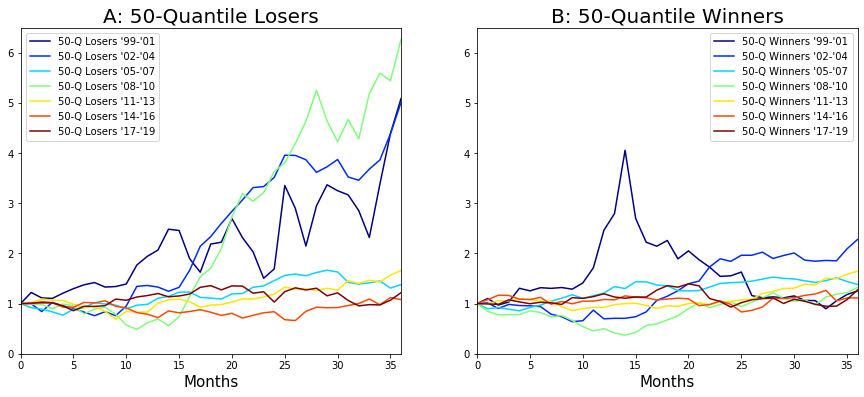

In [23]:
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,10))
(1+q50_losers).cumprod().plot(figsize=(15,6),fontsize=10,colormap='jet',ylim=(0,6.5),ax=ax1)
(1+q50_winners).cumprod().plot(figsize=(15,6),fontsize=10,colormap='jet',ylim=(0,6.5),ax=ax2)
#plt.tight_layout() 
ax1.set_title('A: 50-Quantile Losers',fontsize=20)
ax2.set_title('B: 50-Quantile Winners',fontsize=20)
ax1.set_xlabel('Months',fontsize=15)
ax2.set_xlabel('Months',fontsize=15)

## Sims

In [24]:
table_ports

,50-Q Losers,20-Q Losers,10-Q Losers,5-Q Losers,50-Q Winners,20-Q Winners,10-Q Winners,5-Q Winners,50-Q Long-short,20-Q Long-short,Universe ew
date,,,,,,,,,,,
199901,0.221457,0.193058,0.155420,0.119144,0.102785,0.068447,0.060770,0.040876,0.193302,0.139965,0.050059
199902,-0.087795,-0.075345,-0.062066,-0.053668,-0.118625,-0.092353,-0.084095,-0.075074,-0.004477,0.000463,-0.056502
199903,-0.009852,-0.009477,-0.002472,-0.000959,0.062046,0.032242,0.008065,-0.001061,-0.003848,0.006718,-0.009412
199904,0.093935,0.121361,0.125240,0.120093,0.264587,0.177077,0.143173,0.107511,-0.000497,0.012092,0.086183
199905,0.075718,0.057188,0.051687,0.052975,-0.039045,-0.021002,-0.000534,0.012103,0.064888,0.037255,0.031206
...,...,...,...,...,...,...,...,...,...,...,...
201908,-0.102040,-0.084846,-0.075077,-0.068201,-0.058248,-0.044368,-0.041154,-0.039435,-0.086118,-0.046927,-0.050862
201909,0.026335,0.031959,0.034009,0.047642,-0.038859,-0.042696,-0.025585,-0.013142,0.033162,0.040320,0.026456
201910,-0.006199,0.003718,0.002587,0.004361,0.001279,-0.003092,-0.009724,0.001150,0.011519,0.020117,0.008264


In [25]:
t = table_ports['50-Q Losers'][0:(0+251+1)].values

In [26]:
def timeser_sample(series,n):
    samples = []
    N = series.size
    i = 0
    while i < (N-n):
        samples.append(series[i:(i+n)])
        i += 1
    return samples

In [27]:
sample_q50_losers = timeser_sample(table_ports['50-Q Losers'].values,36)
sample_q50_winners = timeser_sample(table_ports['50-Q Winners'].values,36)

In [28]:
avg_loser_path = (1+np.insert(pd.DataFrame(sample_q50_losers).mean().values,0,0)).cumprod()
avg_winner_path = (1+np.insert(pd.DataFrame(sample_q50_winners).mean().values,0,0)).cumprod()

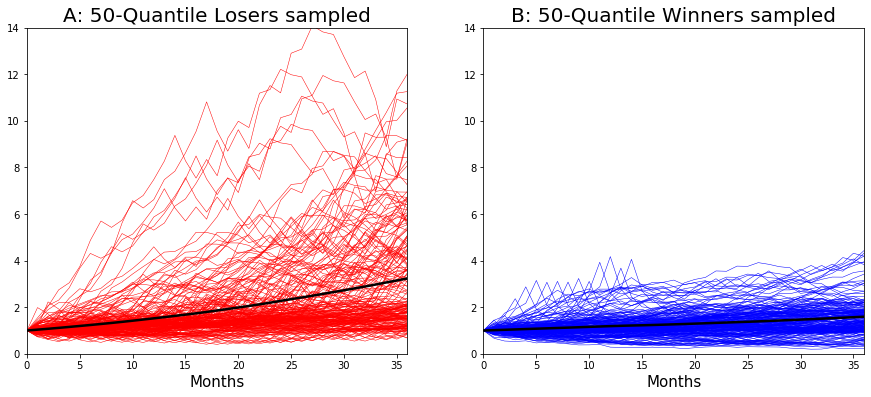

In [29]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
ax1.set_ylim((0,14))
ax1.set_xlim((0,36))
ax1.set_xlabel('Months',fontsize=15)
ax2.set_ylim((0,14))
ax2.set_xlim((0,36))
ax2.set_xlabel('Months',fontsize=15)

ax1.set_title('A: 50-Quantile Losers sampled',fontsize=20)
ax2.set_title('B: 50-Quantile Winners sampled',fontsize=20)

for ser in sample_q50_losers:
    cum_ser = (1 + np.insert(ser,0,0)).cumprod()
    ax1.plot(cum_ser,'r',linewidth=0.5)
    
for ser in sample_q50_winners:
    cum_ser = (1 + np.insert(ser,0,0)).cumprod()
    ax2.plot(cum_ser,'b',linewidth=0.5)
    
ax1.plot(avg_loser_path,'k',linewidth=2.5)
ax2.plot(avg_winner_path,'k',linewidth=2.5)